# Prediction using Decision Tree Classifier algorithm on Iris Dataset | TASK 6


## Data Science & Business Analytics

## The Sparks Foundation GRIP MAY 2021


## Task 6-

#### From the 'Iris' dataset with species name, create a decision tree classifier and represent it visually. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

## Author: Rakshit Saxena

In [1]:
##Importing all the useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the Iris.csv file 

Iris_data = pd.read_csv('E:\Iris.csv')

In [3]:
#Checking top 10 records of Dataset..
Iris_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
#Gives us the information about our dataset which is a pandas dataframe. There are 6 columns and their type is mentioned. 
Iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


*Iris_data contains total 6 features in which 4 features(SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalwidthCm) are independent features and 1 feature(Species) is dependent or target variable*

In [5]:
#Describe function gives the basic numerical info about data for each numeric feature.

Iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
#Data points count value for each class labels

Iris_data.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

**All Independent features have not-null float values and target variable has class labels(Iris-setosa, Iris-versicolor, Iris-virginica)**

## Visualization of the Iris.csv data

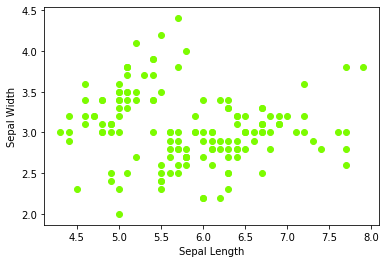

In [7]:
#Sepal length vs sepal width
plt.scatter(x=Iris_data['SepalLengthCm'],y=Iris_data['SepalWidthCm'], color='lawngreen')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

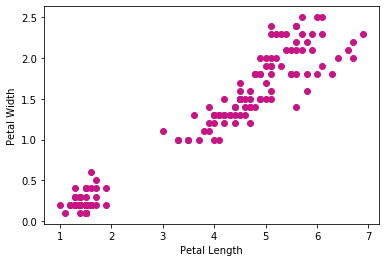

In [8]:
#Petal length vs Petal width
plt.scatter(x=Iris_data['PetalLengthCm'],y=Iris_data['PetalWidthCm'], color='mediumvioletred')
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

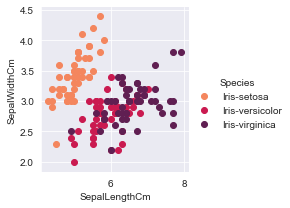

In [9]:
#Using Seaborn to visualise sepal length vs sepal width on target variable.
sns.set_style('darkgrid')
sns.FacetGrid(Iris_data,palette="rocket_r", hue = 'Species') \
   .map(plt.scatter, 'SepalLengthCm','SepalWidthCm') \
   .add_legend()

plt.show()

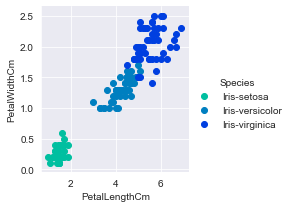

In [10]:
#Using Seaborn to visualise petal length vs petal width based on target variable.
sns.set_style('darkgrid')
sns.FacetGrid(Iris_data,palette="winter_r", hue = 'Species') \
   .map(plt.scatter, 'PetalLengthCm','PetalWidthCm') \
   .add_legend()

plt.show()

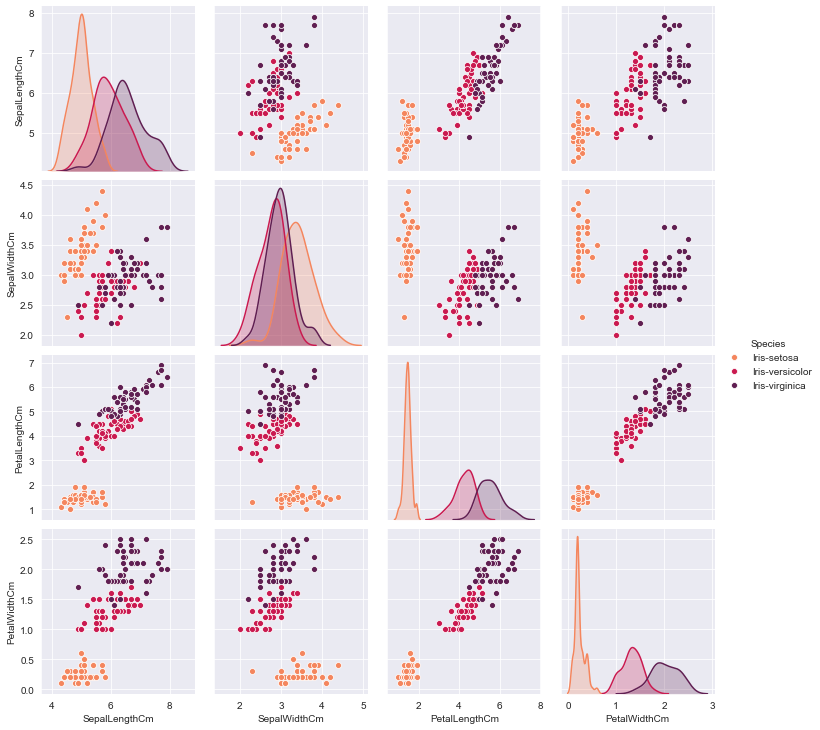

In [11]:
#Pair plot for our iris data
sns.pairplot(Iris_data.drop(['Id'],axis=1), hue='Species', palette="rocket_r")
plt.show()

# **Adding features to our dataset**

##### **Adding 2 columns, Sepal-petal length difference and Sepal-petal width difference**

In [12]:
Iris_data['Sepal_petal_len_diff'] = Iris_data['SepalLengthCm']-Iris_data['PetalLengthCm']
Iris_data['Sepal_petal_width_diff'] = Iris_data['SepalWidthCm']-Iris_data['PetalWidthCm']
Iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_petal_len_diff,Sepal_petal_width_diff
0,1,5.1,3.5,1.4,0.2,Iris-setosa,3.7,3.3
1,2,4.9,3.0,1.4,0.2,Iris-setosa,3.5,2.8
2,3,4.7,3.2,1.3,0.2,Iris-setosa,3.4,3.0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,3.1,2.9
4,5,5.0,3.6,1.4,0.2,Iris-setosa,3.6,3.4
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,1.5,0.7
146,147,6.3,2.5,5.0,1.9,Iris-virginica,1.3,0.6
147,148,6.5,3.0,5.2,2.0,Iris-virginica,1.3,1.0
148,149,6.2,3.4,5.4,2.3,Iris-virginica,0.8,1.1


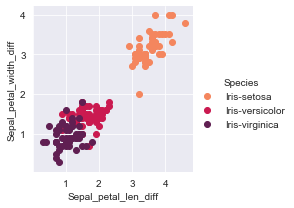

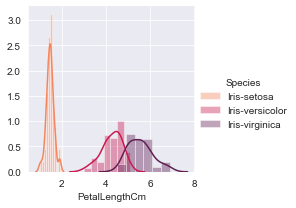

In [13]:
#Sepal_petal_len_diff vs Sepal_petal_width_diff
sns.set_style('darkgrid')
sns.FacetGrid(Iris_data,hue='Species', palette='rocket_r')\
   .map(plt.scatter,'Sepal_petal_len_diff','Sepal_petal_width_diff')\
   .add_legend()
plt.show()

sns.set_style('darkgrid')
sns.FacetGrid(Iris_data,hue='Species', palette='rocket_r')\
   .map(sns.distplot,'PetalLengthCm')\
   .add_legend()
plt.show()

##### **Adding 2 more columns, Sepal length and width difference and Petal length and width difference**

In [14]:
Iris_data['Sepal_diff'] = Iris_data['SepalLengthCm']-Iris_data['SepalWidthCm']
Iris_data['Petal_diff'] = Iris_data['PetalLengthCm']-Iris_data['PetalWidthCm']
Iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_petal_len_diff,Sepal_petal_width_diff,Sepal_diff,Petal_diff
0,1,5.1,3.5,1.4,0.2,Iris-setosa,3.7,3.3,1.6,1.2
1,2,4.9,3.0,1.4,0.2,Iris-setosa,3.5,2.8,1.9,1.2
2,3,4.7,3.2,1.3,0.2,Iris-setosa,3.4,3.0,1.5,1.1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,3.1,2.9,1.5,1.3
4,5,5.0,3.6,1.4,0.2,Iris-setosa,3.6,3.4,1.4,1.2
...,...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,1.5,0.7,3.7,2.9
146,147,6.3,2.5,5.0,1.9,Iris-virginica,1.3,0.6,3.8,3.1
147,148,6.5,3.0,5.2,2.0,Iris-virginica,1.3,1.0,3.5,3.2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,0.8,1.1,2.8,3.1


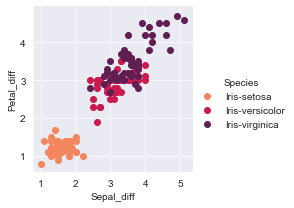

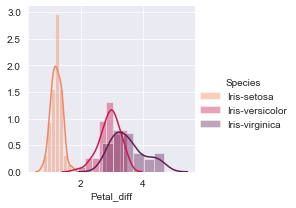

In [15]:
#Sepal_diff vs Petal_diff
sns.set_style('darkgrid')
sns.FacetGrid(Iris_data,hue='Species', palette="rocket_r")\
   .map(plt.scatter,'Sepal_diff','Petal_diff')\
   .add_legend()
plt.show()    


sns.set_style('darkgrid')
sns.FacetGrid(Iris_data,hue='Species', palette="rocket_r")\
   .map(sns.distplot,'Petal_diff')\
   .add_legend()
plt.show()

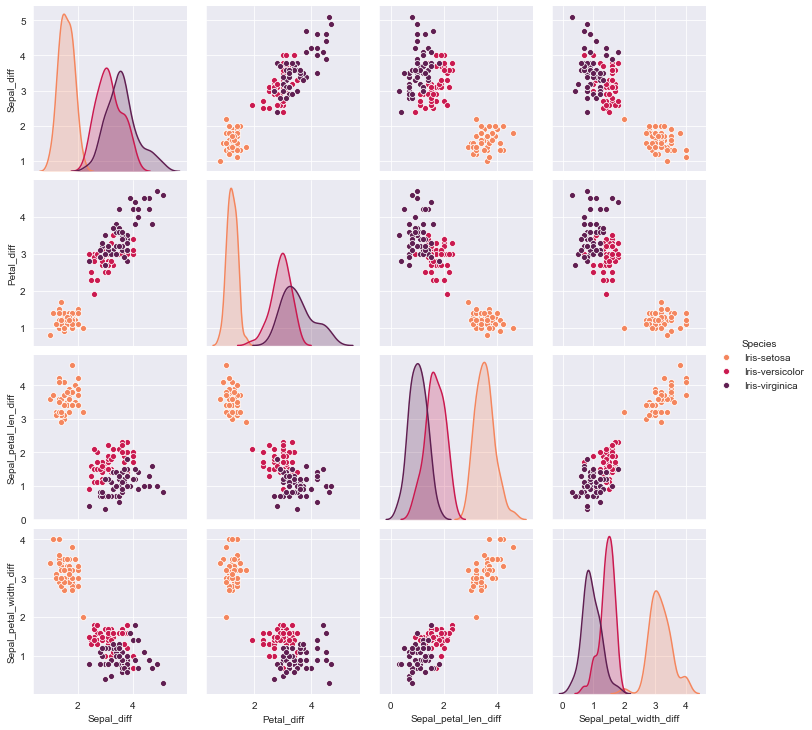

In [16]:
# All 4 new features
sns.pairplot(Iris_data[['Species', 'Sepal_diff', 'Petal_diff', 'Sepal_petal_len_diff',\
       'Sepal_petal_width_diff']], hue='Species', palette="rocket_r")
plt.show()

In [17]:
#Dropping ID column because it is uneccessary for our training of the machine learning model

Iris_data.drop(['Id'],axis=1,inplace=True)

In [18]:
Iris_data #As we can see the ID column is not there anymore

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_petal_len_diff,Sepal_petal_width_diff,Sepal_diff,Petal_diff
0,5.1,3.5,1.4,0.2,Iris-setosa,3.7,3.3,1.6,1.2
1,4.9,3.0,1.4,0.2,Iris-setosa,3.5,2.8,1.9,1.2
2,4.7,3.2,1.3,0.2,Iris-setosa,3.4,3.0,1.5,1.1
3,4.6,3.1,1.5,0.2,Iris-setosa,3.1,2.9,1.5,1.3
4,5.0,3.6,1.4,0.2,Iris-setosa,3.6,3.4,1.4,1.2
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,1.5,0.7,3.7,2.9
146,6.3,2.5,5.0,1.9,Iris-virginica,1.3,0.6,3.8,3.1
147,6.5,3.0,5.2,2.0,Iris-virginica,1.3,1.0,3.5,3.2
148,6.2,3.4,5.4,2.3,Iris-virginica,0.8,1.1,2.8,3.1


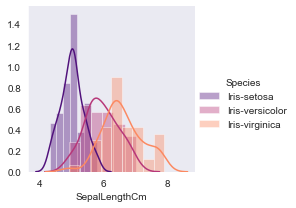

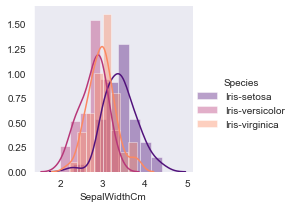

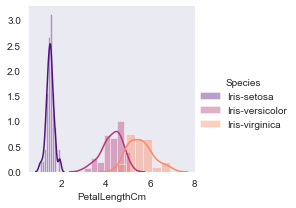

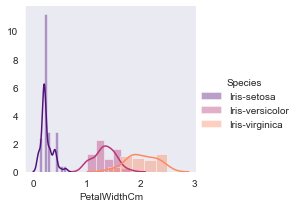

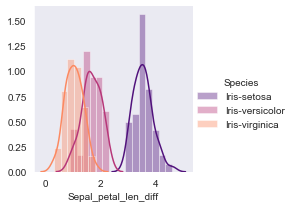

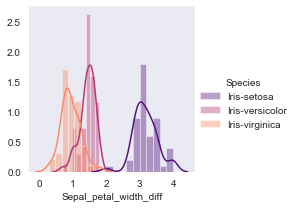

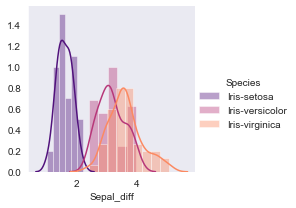

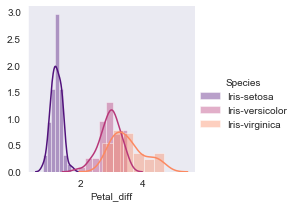

In [19]:
#Exploring distribution plot for all features

for i in Iris_data.columns:
    if i == 'Species':
        continue
    sns.set_style('dark')
    sns.FacetGrid(Iris_data,hue='Species', palette='magma')\
    .map(sns.distplot,i)\
    .add_legend()
    plt.show()

## Decision Tree Classifier model building

[Text(209.25, 199.32, 'X[5] <= 1.9\ngini = 0.665\nsamples = 94\nvalue = [30, 30, 34]'),
 Text(167.4, 163.07999999999998, 'X[3] <= 1.55\ngini = 0.498\nsamples = 64\nvalue = [0, 30, 34]'),
 Text(83.7, 126.83999999999999, 'X[7] <= 3.5\ngini = 0.124\nsamples = 30\nvalue = [0, 28, 2]'),
 Text(41.85, 90.6, 'gini = 0.0\nsamples = 28\nvalue = [0, 28, 0]'),
 Text(125.55000000000001, 90.6, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(251.10000000000002, 126.83999999999999, 'X[4] <= 1.65\ngini = 0.111\nsamples = 34\nvalue = [0, 2, 32]'),
 Text(209.25, 90.6, 'X[6] <= 2.75\ngini = 0.059\nsamples = 33\nvalue = [0, 1, 32]'),
 Text(167.4, 54.359999999999985, 'X[3] <= 1.75\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(125.55000000000001, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(209.25, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(251.10000000000002, 54.359999999999985, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 31]'),
 Text(292.9

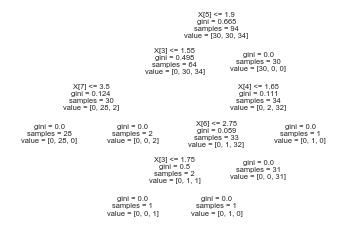

In [20]:
#As per our analysis, we can't find much information from new features
#We will use the new features for classification

'''Importing libraries to create Decision tree classifier and visualize the tree structure'''

from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score


'''Separating independent variables/target variables from the dataset'''


X = Iris_data[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm', 'PetalWidthCm',\
               'Sepal_petal_len_diff','Sepal_petal_width_diff','Sepal_diff','Petal_diff',]]
y = Iris_data['Species']


#Before training the model we have to split the data into an Actual Train and Actual Test Dataset
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.30, random_state=42)

#Spliting data into validation train and validation test
Xt, Xcv, Yt, Ycv = train_test_split(Xtrain, Ytrain, test_size=0.10, random_state=42)


'''Now we have create a Decision tree classifier and train it with training dataset.'''


Iris_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_clf.fit(Xt, Yt)

#Visualizing the Tree which is formed on trained dataset
tree.plot_tree(Iris_clf)

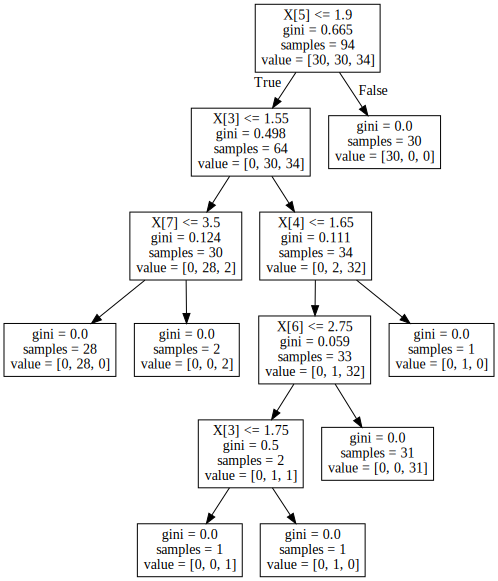

In [21]:
#Visualizing Decision Tree using graphviz library
dot_data = tree.export_graphviz(Iris_clf, out_file=None)

graph = graphviz.Source(dot_data)
graph

In [31]:
#Decision tree using cross validation method to get the accuracy or performance score of our model.
print('Accuracy score is:',cross_val_score(Iris_clf, Xt, Yt, cv=3, scoring='accuracy').mean()*100,'%')


Accuracy score is: 91.53225806451614 %


In [32]:
#Checking validation test data on our trained model and getting performance metrices

from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

Y_hat = Iris_clf.predict(Xcv)


print('Accuracy score for validation test data is:',accuracy_score(Ycv, Y_hat)*100,'%')
multilabel_confusion_matrix(Ycv , Y_hat)

Accuracy score for validation test data is: 81.81818181818183 %


array([[[10,  0],
        [ 0,  1]],

       [[ 3,  1],
        [ 1,  6]],

       [[ 7,  1],
        [ 1,  2]]], dtype=int64)

In [24]:
#Checking our model performance on actual unseen test data 
YT_hat = Iris_clf.predict(Xtest)
YT_hat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_hat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_hat)

Model Accuracy Score on totally unseen data(Xtest) is: 93.33333333333333 %


array([[[26,  0],
        [ 0, 19]],

       [[31,  1],
        [ 2, 11]],

       [[30,  2],
        [ 1, 12]]], dtype=int64)

[Text(209.25, 203.85, 'X[4] <= 2.6\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(167.4, 176.67000000000002, 'X[2] <= 4.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(83.7, 149.49, 'X[5] <= 0.9\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(41.85, 122.31, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(125.55000000000001, 122.31, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(251.10000000000002, 149.49, 'X[4] <= 1.65\ngini = 0.214\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(209.25, 122.31, 'X[6] <= 2.75\ngini = 0.142\nsamples = 39\nvalue = [0, 3, 36]'),
 Text(167.4, 95.13, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(251.10000000000002, 95.13, 'X[3] <= 1.7\ngini = 0.1\nsamples = 38\nvalue = [0, 2, 36]'),
 Text(209.25, 67.94999999999999, 'X[5] <= 1.15\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(167.4, 40.77000000000001, 'X[1] <= 2.35\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(125.55000000000001, 13.59000000000

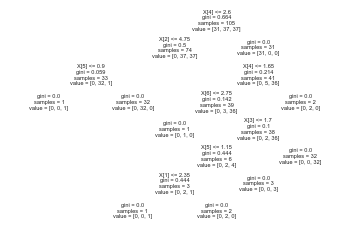

In [25]:
'''Training model on Actual train data... '''
Iris_Fclf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_Fclf.fit(Xtrain, Ytrain)

#Visualizing tree structure..
tree.plot_tree(Iris_Fclf)

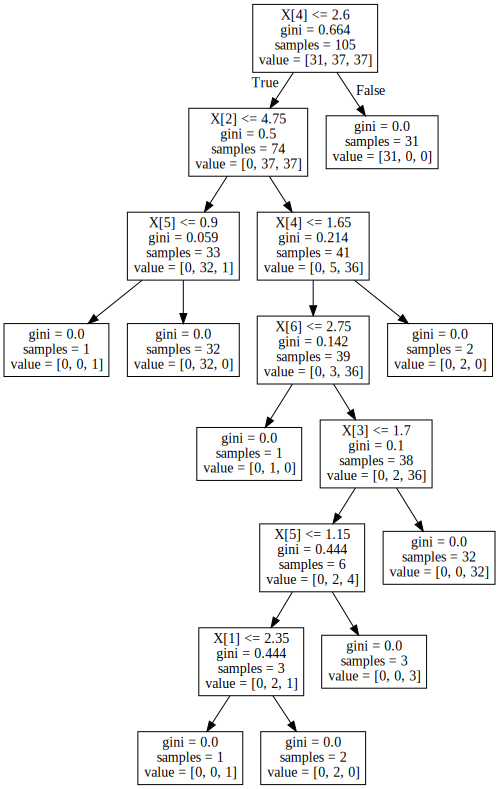

In [26]:
#Final Decision tree build for deployment

dot_data = tree.export_graphviz(Iris_Fclf, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [27]:
#Checking the performance of model on Actual Test data...

YT_Fhat = Iris_Fclf.predict(Xtest)
YT_Fhat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_Fhat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_Fhat)

Model Accuracy Score on totally unseen data(Xtest) is: 95.55555555555556 %


array([[[26,  0],
        [ 0, 19]],

       [[31,  1],
        [ 1, 12]],

       [[31,  1],
        [ 1, 12]]], dtype=int64)

In [28]:
#Predicting the new points, except from Dataset

Test_point = [[5.1, 3.6, 1.4, 0.2, 3.7, 3.3, 1.6, 1.2],
             [6.9, 3.2, 5.2, 2.5, 1.4, 1.1, 3.9, 2.8],
             [6.2, 3.6, 2.4, 1.6, 3.9, 3.3, 1.9, 1.9],
             [5.5, 4.5, 5.5, 0.2, 4.0, 3.3, 1.6, 1.1],
             [7.5, 3.1, 2.3, 2.9, 1.4, 1.4, 3.9, 2.2],
             [6.5, 3.7, 1.1, 2.8, 4.0, 1.1, 4.6, 2.9]]

print(Iris_Fclf.predict(Test_point))

['Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa']


# Thank you.